Traiettoria 0 salvata in: trajectories\path_0.npz
Traiettoria 1 salvata in: trajectories\path_1.npz
Traiettoria 2 salvata in: trajectories\path_2.npz
Traiettoria 3 salvata in: trajectories\path_3.npz
Traiettoria 4 salvata in: trajectories\path_4.npz
Traiettoria 5 salvata in: trajectories\path_5.npz


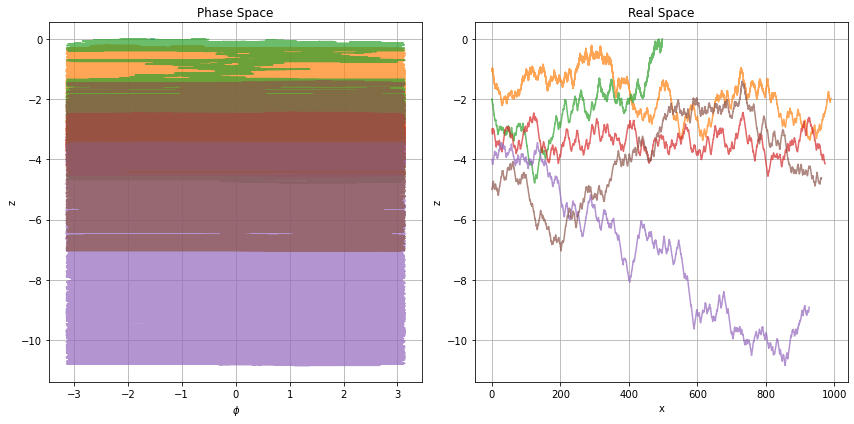

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os

def save_trajectory(x, z, phi, t, path_index, folder="trajectories"):
    """
    Salva una singola traiettoria in formato .npz
    """
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    filename = os.path.join(folder, f"path_{path_index}.npz")
    np.savez(filename, x=x, z=z, phi=phi, t=t)

    print(f"Traiettoria {path_index} salvata in: {filename}")

D_t = 0.0
D_r = 0.08

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 0.1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 6  

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) - 0.5 * 1/psi * np.sin(phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]) - vg)*dt + np.sqrt(2*D_t*dt)*np.random.randn()
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -i, phi0, v0, t)
    paths.append((x, z, phi))
    save_trajectory(x, z, phi, t, i)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.7)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.7)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
#plt.savefig('Ffinal_MS_stochastic3.png', dpi=300)
plt.show()

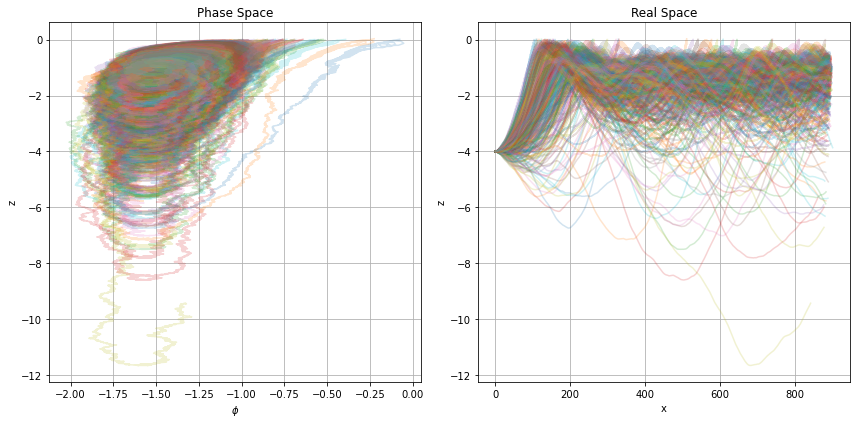

In [20]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001
sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_runs = 500     # <-- 1000 ripetizioni

def integrate(x0, z0, phi0, v0, t):
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)

    x[0], z[0], phi[0] = x0, z0, phi0

    for i in range(N-1):

        phi[i+1] = phi[i] + (
            lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i])
            - 0.5 * 1/psi * np.sin(phi[i])
            + 0.5*sigma*(1 + lamda*np.cos(2*phi[i]))
        )*dt + np.sqrt(2*D_r*dt)*np.random.randn()

        x[i+1] = x[i] + (
            alpha*np.exp(z[i])*np.cos(x[i] - t[i])
            + v0*np.sin(phi[i])
            + sigma * (beta + z[i])
        )*dt + np.sqrt(2*D_t*dt)*np.random.randn()

        z[i+1] = z[i] + (
            alpha*np.exp(z[i])*np.sin(x[i] - t[i])
            + v0*np.cos(phi[i]) - vg
        )*dt + np.sqrt(2*D_t*dt)*np.random.randn()

        # stop quando z torna positivo
        if z[i+1] > 0:
            return x[:i+2], z[:i+2], phi[:i+2]

    return x, z, phi


# ---- Simulazioni ----
paths = []
for k in range(num_runs):
    phi0 = -0.5 * np.pi
    x, z, phi = integrate(0, -4, phi0, v0, t)
    paths.append((x, z, phi))

# ---- Plot ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.2)

ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.2)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout()
#plt.savefig('Ffinal_MS_stochastic_singleZ_1000runs.png', dpi=300)
plt.show()


In [21]:
def plot_averages_from_paths(paths, t):
    """
    paths = lista di tuple (x, z, phi) di lunghezze variabili
    t = vettore tempi (serve come base di interpolazione)
    """

    # --- costruiamo una griglia temporale comune ---
    t_common = t                      # uso direttamente la tua t
    T = len(t_common)

    # matrici per interpolare x, z, phi su t_common
    X_mat = []
    Z_mat = []
    PHI_mat = []

    for x, z, phi in paths:
        # la traiettoria può essere più corta → interpolo
        t_old = t[:len(x)]           

        X_mat.append(np.interp(t_common, t_old, x))
        Z_mat.append(np.interp(t_common, t_old, z))
        PHI_mat.append(np.interp(t_common, t_old, phi))

    # trasformo in array (num_runs × T)
    X_mat  = np.array(X_mat)
    Z_mat  = np.array(Z_mat)
    PHI_mat = np.array(PHI_mat)

    # --- medie ---
    X_mean  = X_mat.mean(axis=0)
    Z_mean  = Z_mat.mean(axis=0)
    PHI_mean = PHI_mat.mean(axis=0)

    # --- plot ---
    plt.figure(figsize=(12, 5))

    # Phase space medio
    plt.subplot(1, 2, 1)
    plt.plot(PHI_mean, Z_mean, color='black')
    plt.xlabel("phi (mean)")
    plt.ylabel("z (mean)")
    plt.title("Average Phase Space")
    plt.grid(True)

    # Real space medio
    plt.subplot(1, 2, 2)
    plt.plot(X_mean, Z_mean, color='black')
    plt.xlabel("x (mean)")
    plt.ylabel("z (mean)")
    plt.title("Average Real Space")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


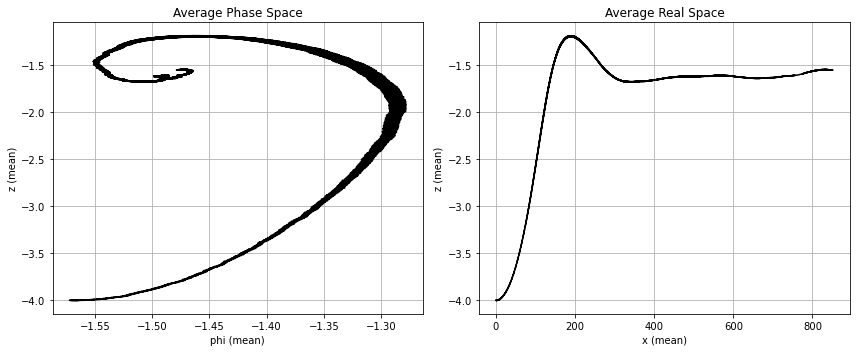

In [22]:
plot_averages_from_paths(paths, t)

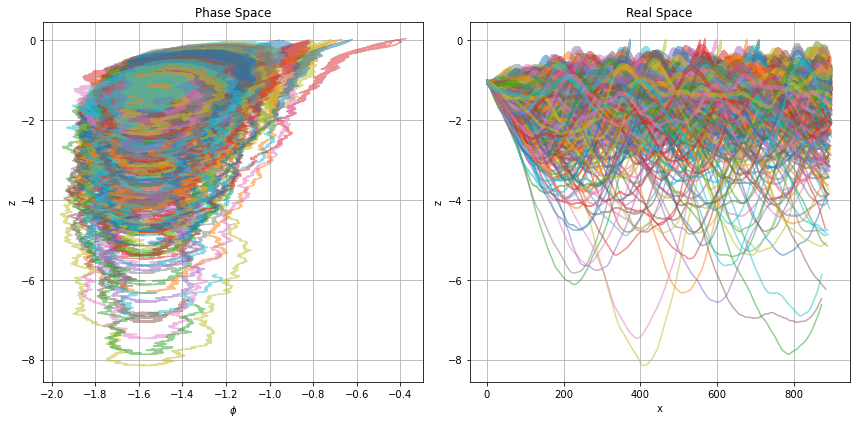

In [59]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -1, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths1.png', dpi=300)
plt.show()

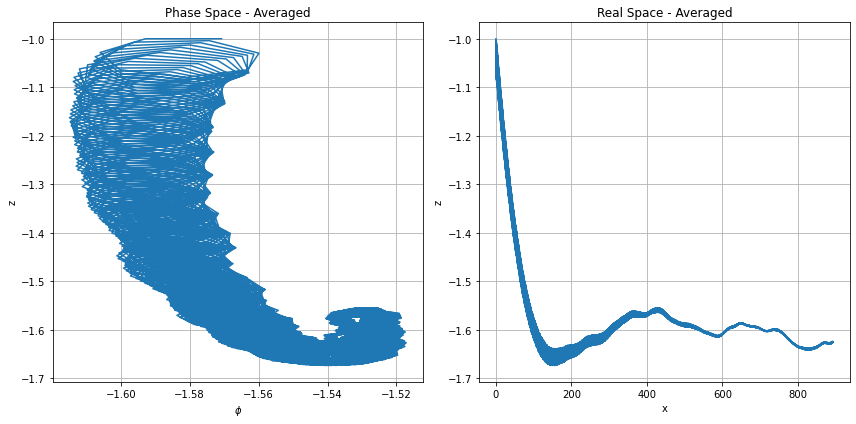

In [60]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average1.png', dpi=300)
plt.show()


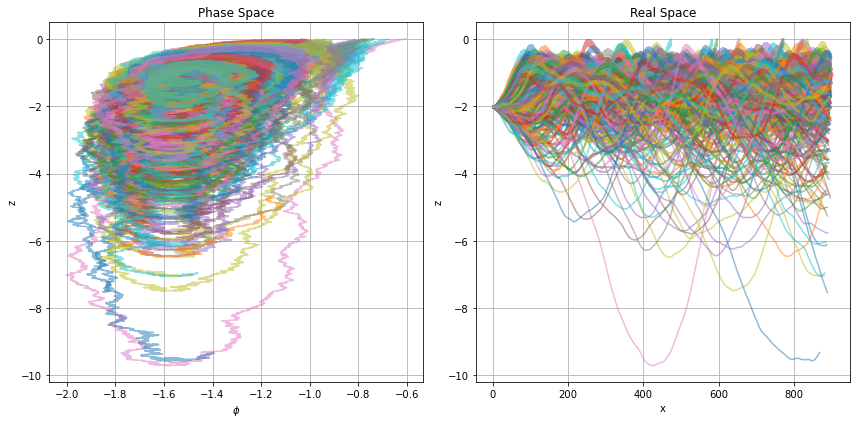

In [61]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -2, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths2.png', dpi=300)
plt.show()

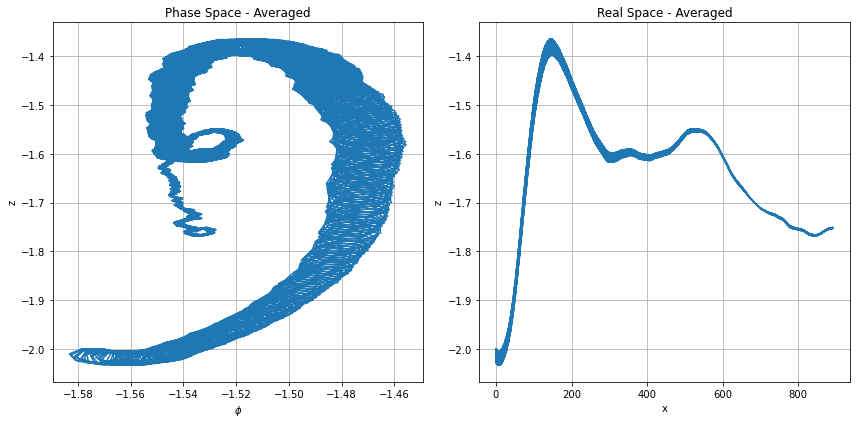

In [62]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average2.png', dpi=300)
plt.show()


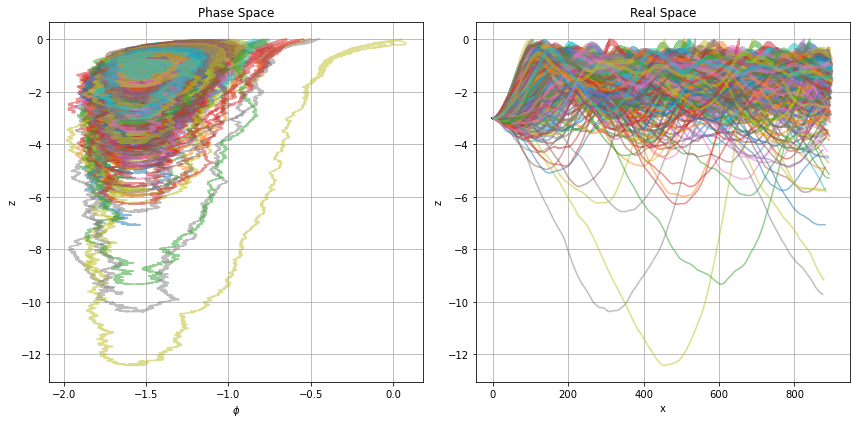

In [63]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -3, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths3.png', dpi=300)
plt.show()

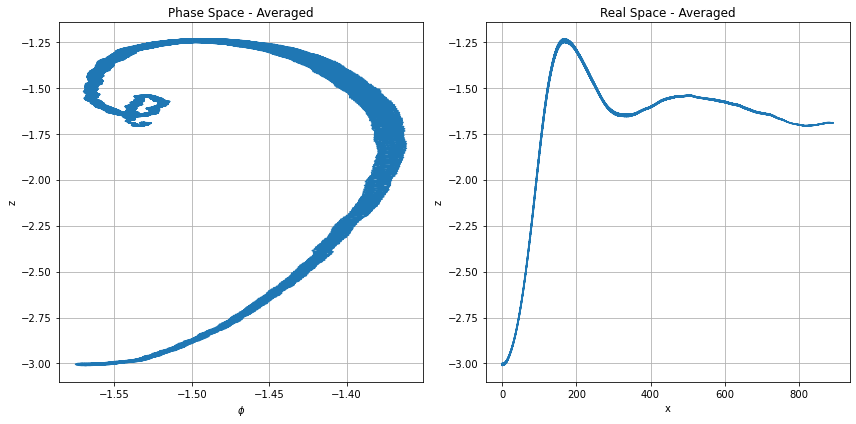

In [64]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average3.png', dpi=300)
plt.show()


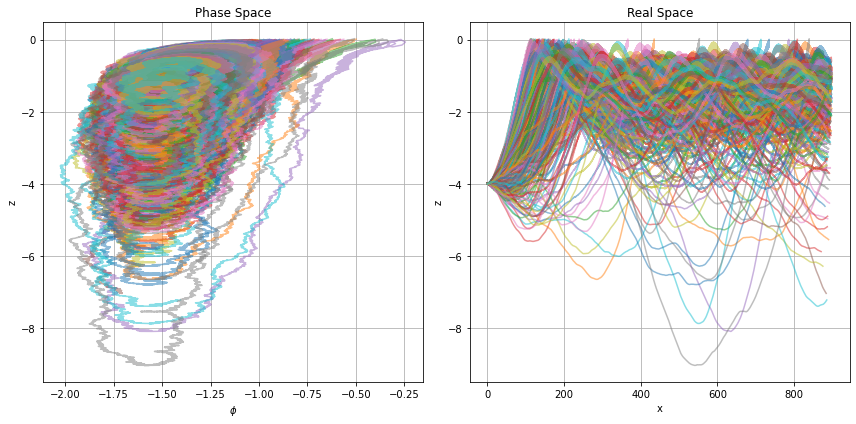

In [65]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -4, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths4.png', dpi=300)
plt.show()

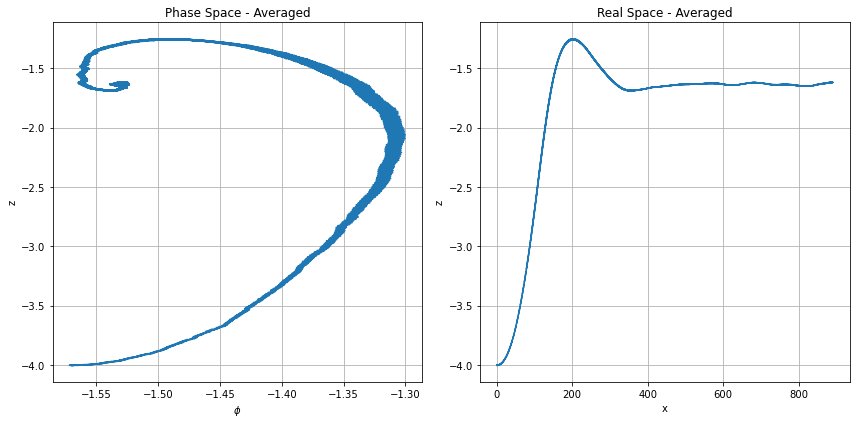

In [66]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average4.png', dpi=300)
plt.show()


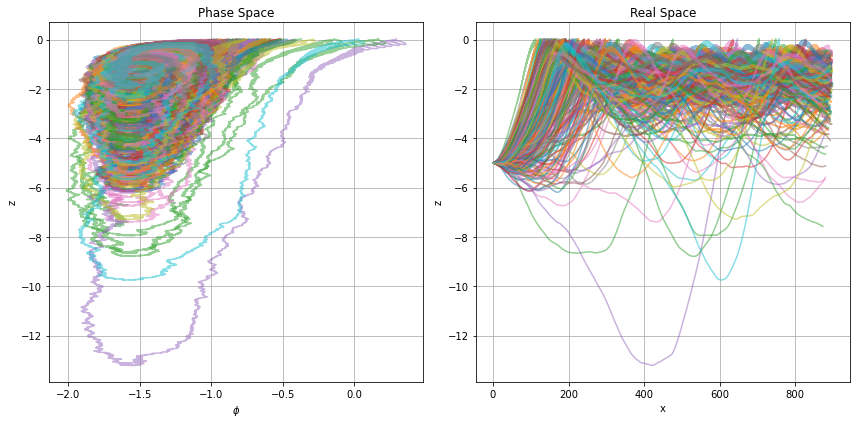

In [67]:
import numpy as np
import matplotlib.pyplot as plt

D_t = 0.0
D_r = 0.00001

sigma = 0.001
beta = 100
lamda = 0.6
alpha = 0.1
v0 = 0.01
vg = 0
psi = np.inf

t0 = 0.0
tn = 10000
dt = 1
t = np.arange(t0, tn + 1e-6, dt)

num_paths = 500

def integrate(x0, z0, phi0, v0, t):
    
    N = len(t)
    x = np.zeros(N)
    z = np.zeros(N)
    phi = np.zeros(N)
    x[0], z[0], phi[0] = x0, z0, phi0
    
    for i in range(N-1):
        
        phi[i+1] = phi[i] + (lamda*alpha*np.exp(z[i])*np.cos(x[i] - t[i] + 2*phi[i]) + 0.5*sigma*(1 + lamda*np.cos(2*phi[i])))*dt + np.sqrt(2*D_r*dt)*np.random.randn()
        x[i+1] = x[i] + (alpha*np.exp(z[i])*np.cos(x[i] - t[i]) + v0*np.sin(phi[i]) + sigma *(beta + z[i]))*dt
        z[i+1] = z[i] + (alpha*np.exp(z[i])*np.sin(x[i] - t[i]) + v0*np.cos(phi[i]))*dt
        
        if z[i+1]>0:
            return x[:i+2], z[:i+2], phi[:i+2]
        
    return x, z, phi

paths = []

for i in range(num_paths):
    phi0 = -0.5*np.pi
    x, z, phi = integrate(0, -5, phi0, v0, t)
    paths.append((x, z, phi))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

for x, z, phi in paths:
    phip = np.mod(phi, 2*np.pi)
    phipp = np.where(phip >= np.pi, phip - 2*np.pi, phip)
    ax1.plot(phipp, z, alpha=0.5)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space')
ax1.grid(True)

for x, z, phi in paths:
    ax2.plot(x, z, alpha=0.5)

ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space')
ax2.grid(True)

plt.tight_layout() 
plt.savefig('MS_manypaths5.png', dpi=300)
plt.show()

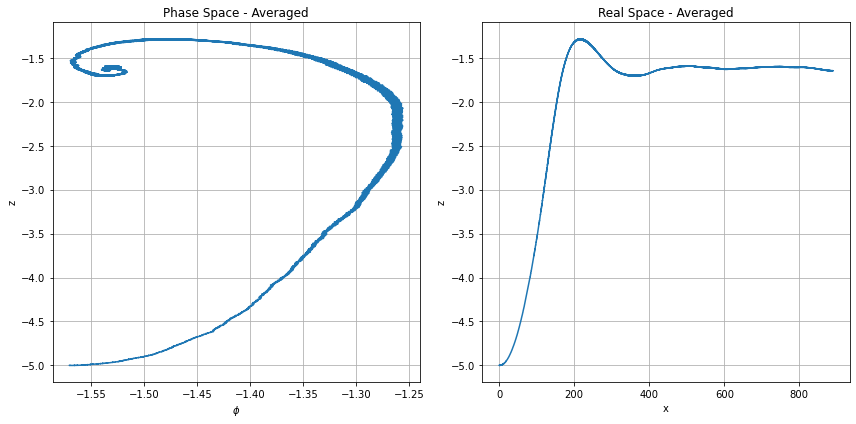

In [68]:
def average(paths, t):

    vpaths = []

    for x, z, phi in paths:
        if len(z) == len(t):
            vpaths.append((x, z, phi))

    xx, zz, pphi = [], [], []

    for x, z, phi in vpaths:
        xx.append(x)
        zz.append(z)
        pphi.append(phi)

    xx = np.array(xx)
    zz = np.array(zz)
    pphi = np.array(pphi)

    return xx.mean(axis=0), zz.mean(axis=0), pphi.mean(axis=0)
    
xm, zm, phim = average(paths, t)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(phim, zm)
ax1.set_xlabel('$\phi$')
ax1.set_ylabel('z')
ax1.set_title('Phase Space - Averaged')
ax1.grid()

ax2.plot(xm, zm)
ax2.set_xlabel('x')
ax2.set_ylabel('z')
ax2.set_title('Real Space - Averaged')
ax2.grid()

plt.tight_layout() 
plt.savefig('MS_average5.png', dpi=300)
plt.show()
